# Train object detection model with yolov8

## Install yolov8

In [13]:
#!pip install ultralytics

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.128 🚀 Python-3.11.3 torch-2.0.1 CPU
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 95.4/228.3 GB disk)


In [52]:
from ultralytics import YOLO

from IPython.display import display, Image

import os

import glob

from pyzbar.pyzbar import decode as qr_decode

from PIL import Image
import cv2

## Prepare a custom dataset

To collect, label and preprocess images I used roboflow as a tool for define the custom dataset.

### Step 1: Collect images
I found images of QR code that I used as dataset

![Image collections](img_markdown/image_collection.png)

### Step 2: Label Images

I used Rofoflow Annotate to define the bounding boxes where is located QR in each photo.

![Label Images](img_markdown/label_image.png)

### Step 3: Preprocessing Images

With roboflow tool, I was able to preprocess images where I did the following:

- Auto-Orient: Applied

![Auto orient](img_markdown/auto_orient.png)

- Resize: Stretch to 640x640

![Resize](img_markdown/resize.png)

### Step4 Image augmentation

Create new training examples for the model to learn from by generating augmented versions of each image in the training set.

- Rotation: Between -15° and +15°

![Rotation](img_markdown/rotation.png)

- Shear ±15° Horizontal, ±15° Vertical

![Shear](img_markdown/shear.png)

- Saturation Between -25% and +25%

![Saturation](img_markdown/saturation.png)

### Step 5 Train/Val/Test split

Order the images to training process

![Train split](img_markdown/train_split.png)

## Custom training

For this case we are going to use YOLOv8s. In the following image, we can see the difference between the size models:<br><br>
![Comparison yolov8 size](https://api.wandb.ai/files/mukilan/images/projects/37545819/db2573fc.png)

In [6]:
!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=10 imgsz=800 plots=True

100% 21.5M/21.5M [00:00<00:00, 404MB/s]
Ultralytics YOLOv8.0.130 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Colab_Notebooks/truora/qr_scanner/yolov8/datasets/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

## Evaluation training

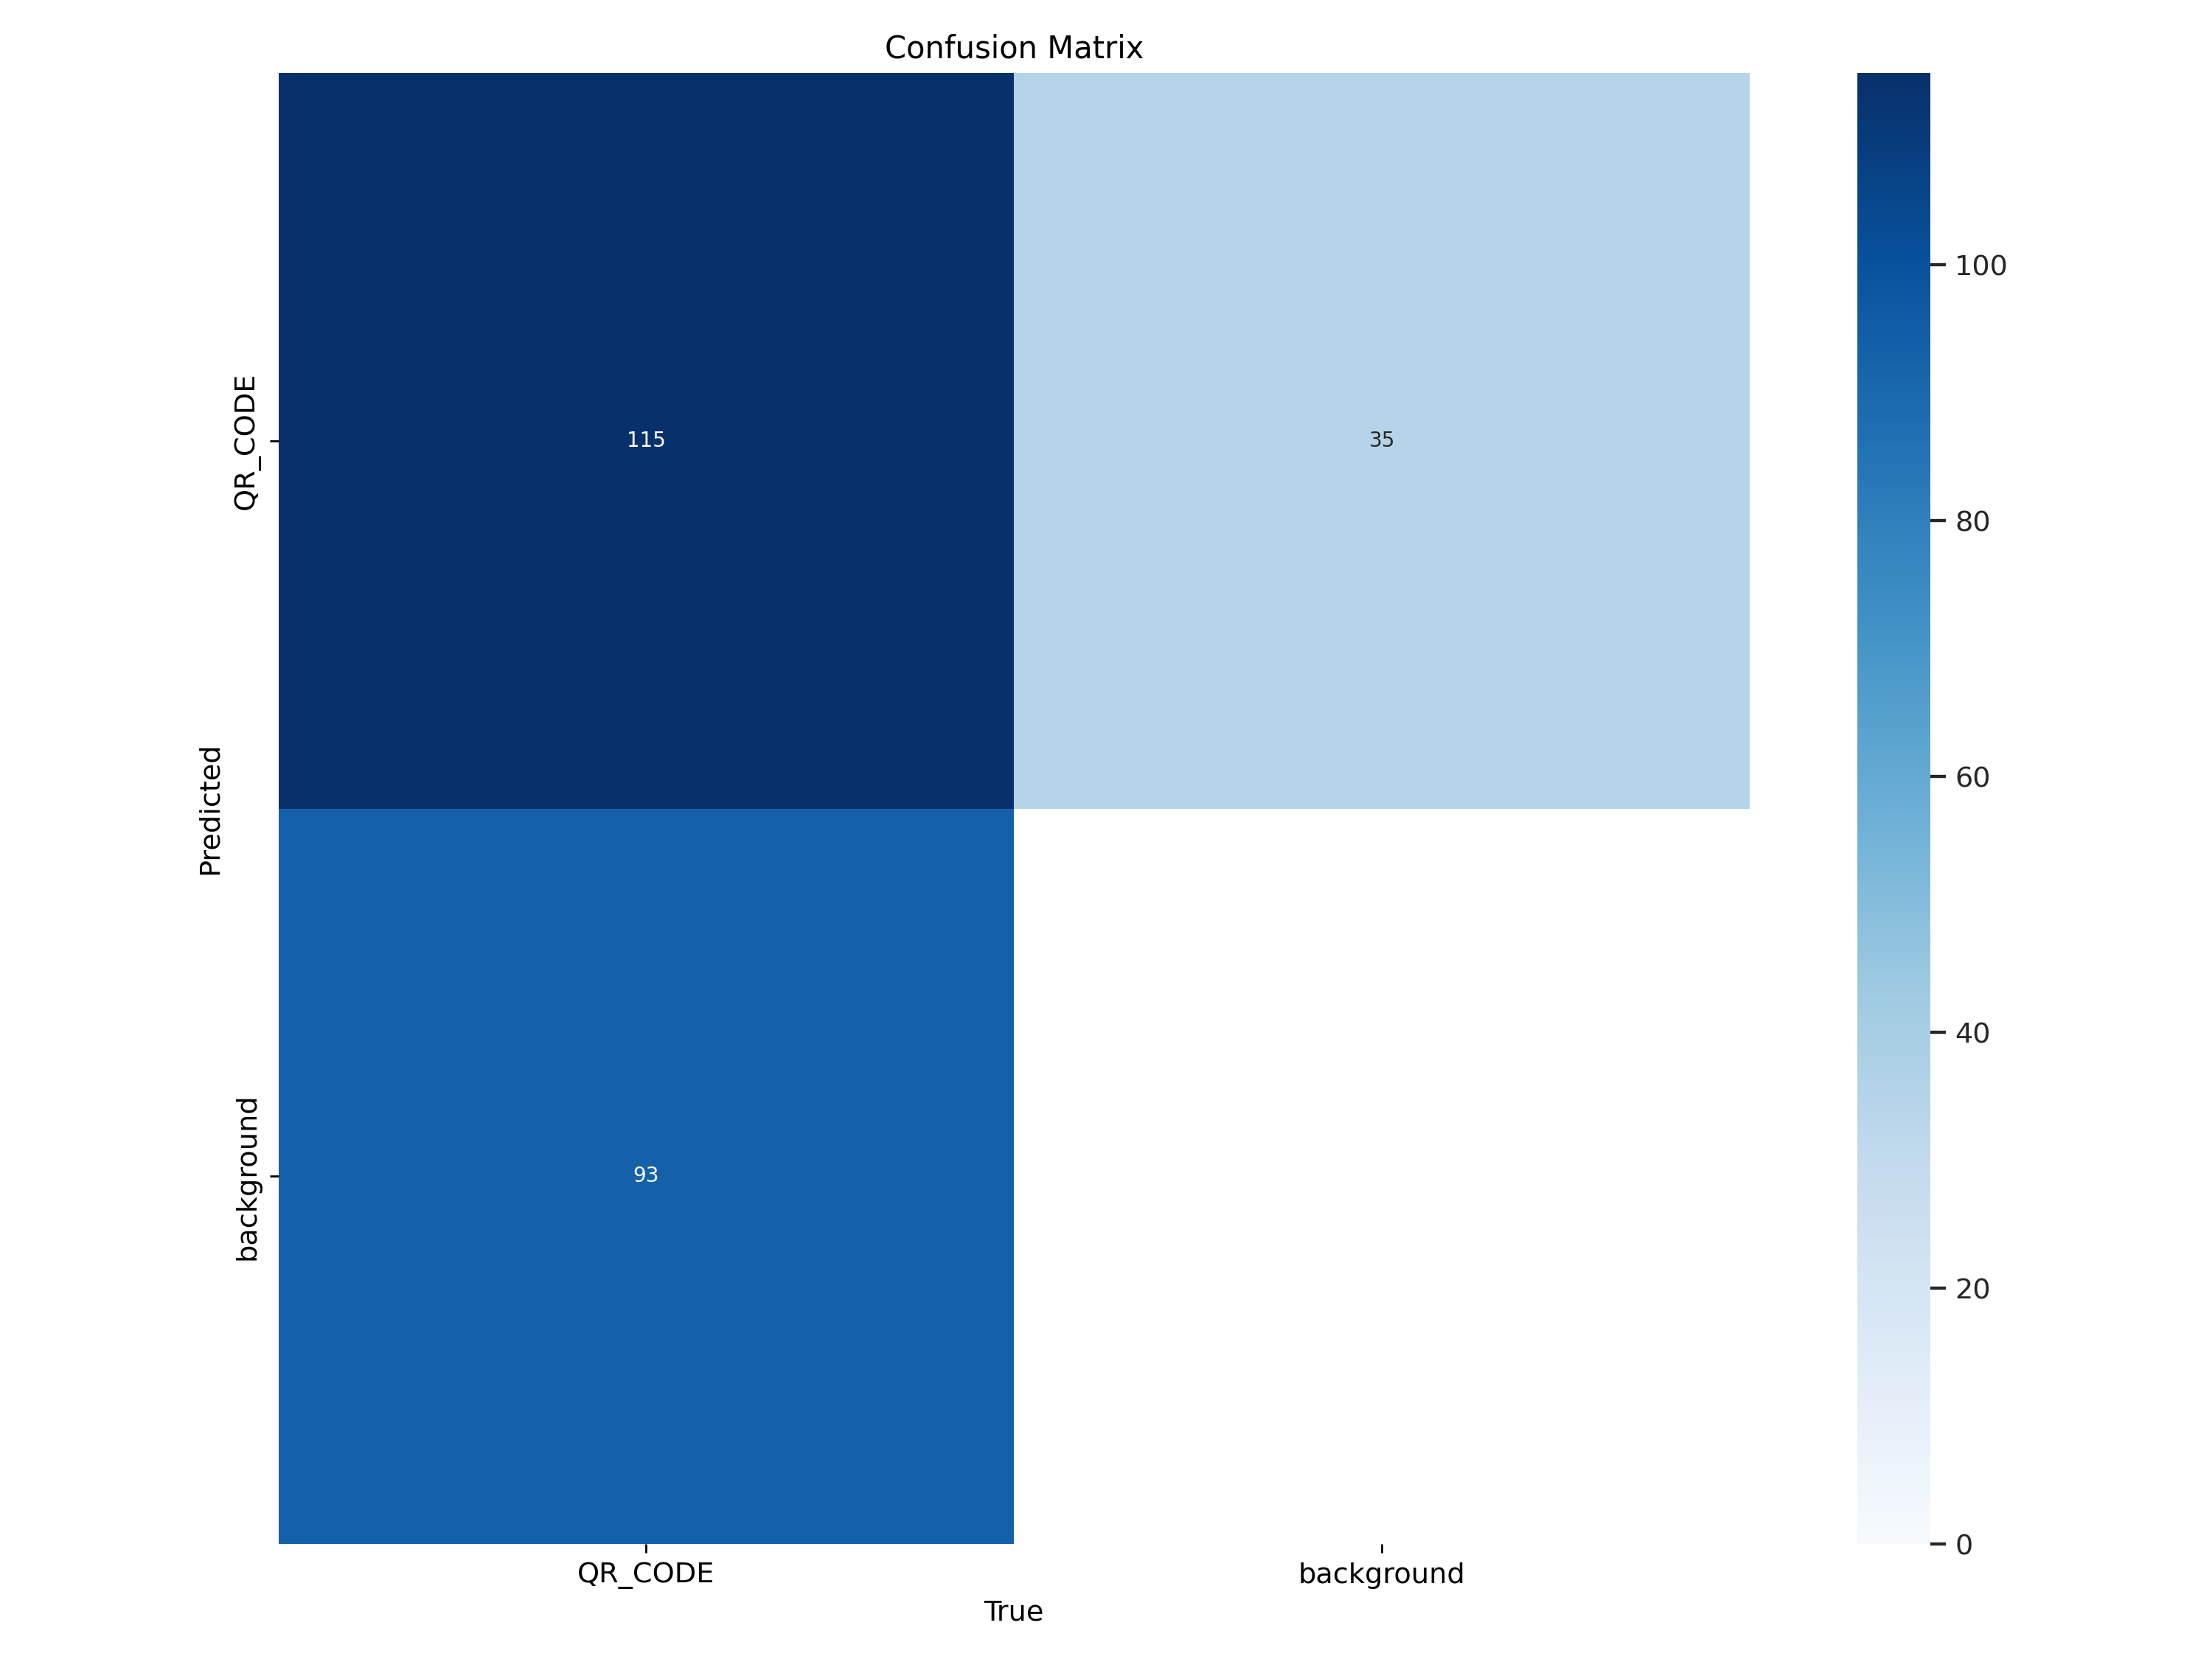

In [9]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

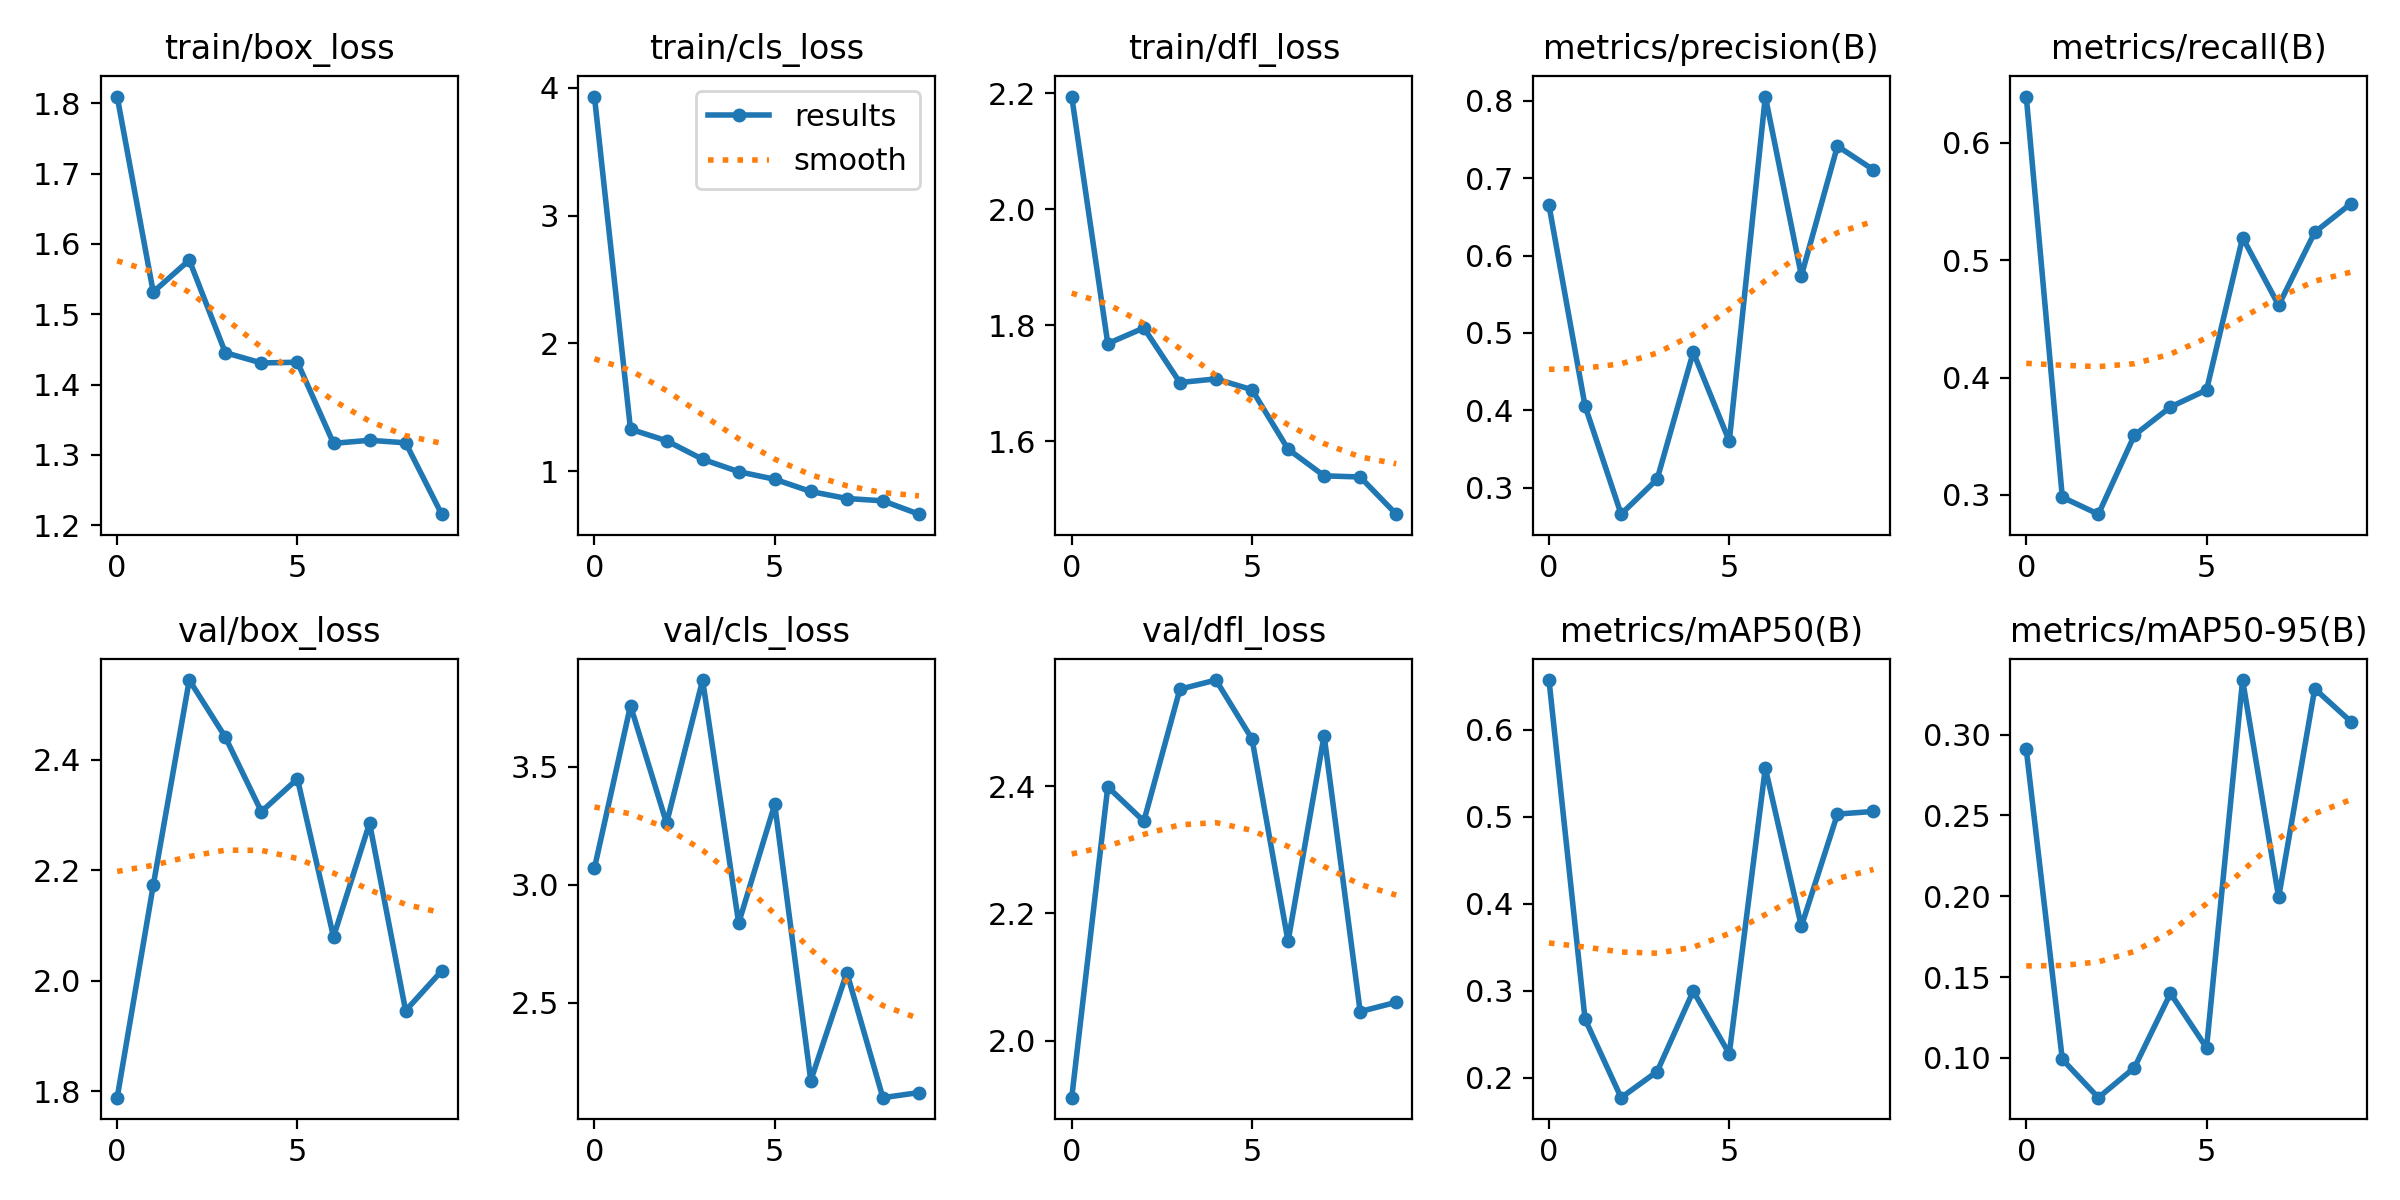

In [10]:
Image(filename=f'runs/detect/train/results.png', width=600)

mAP and loss plots after training the YOLOv8 Small model on the qr code dataset

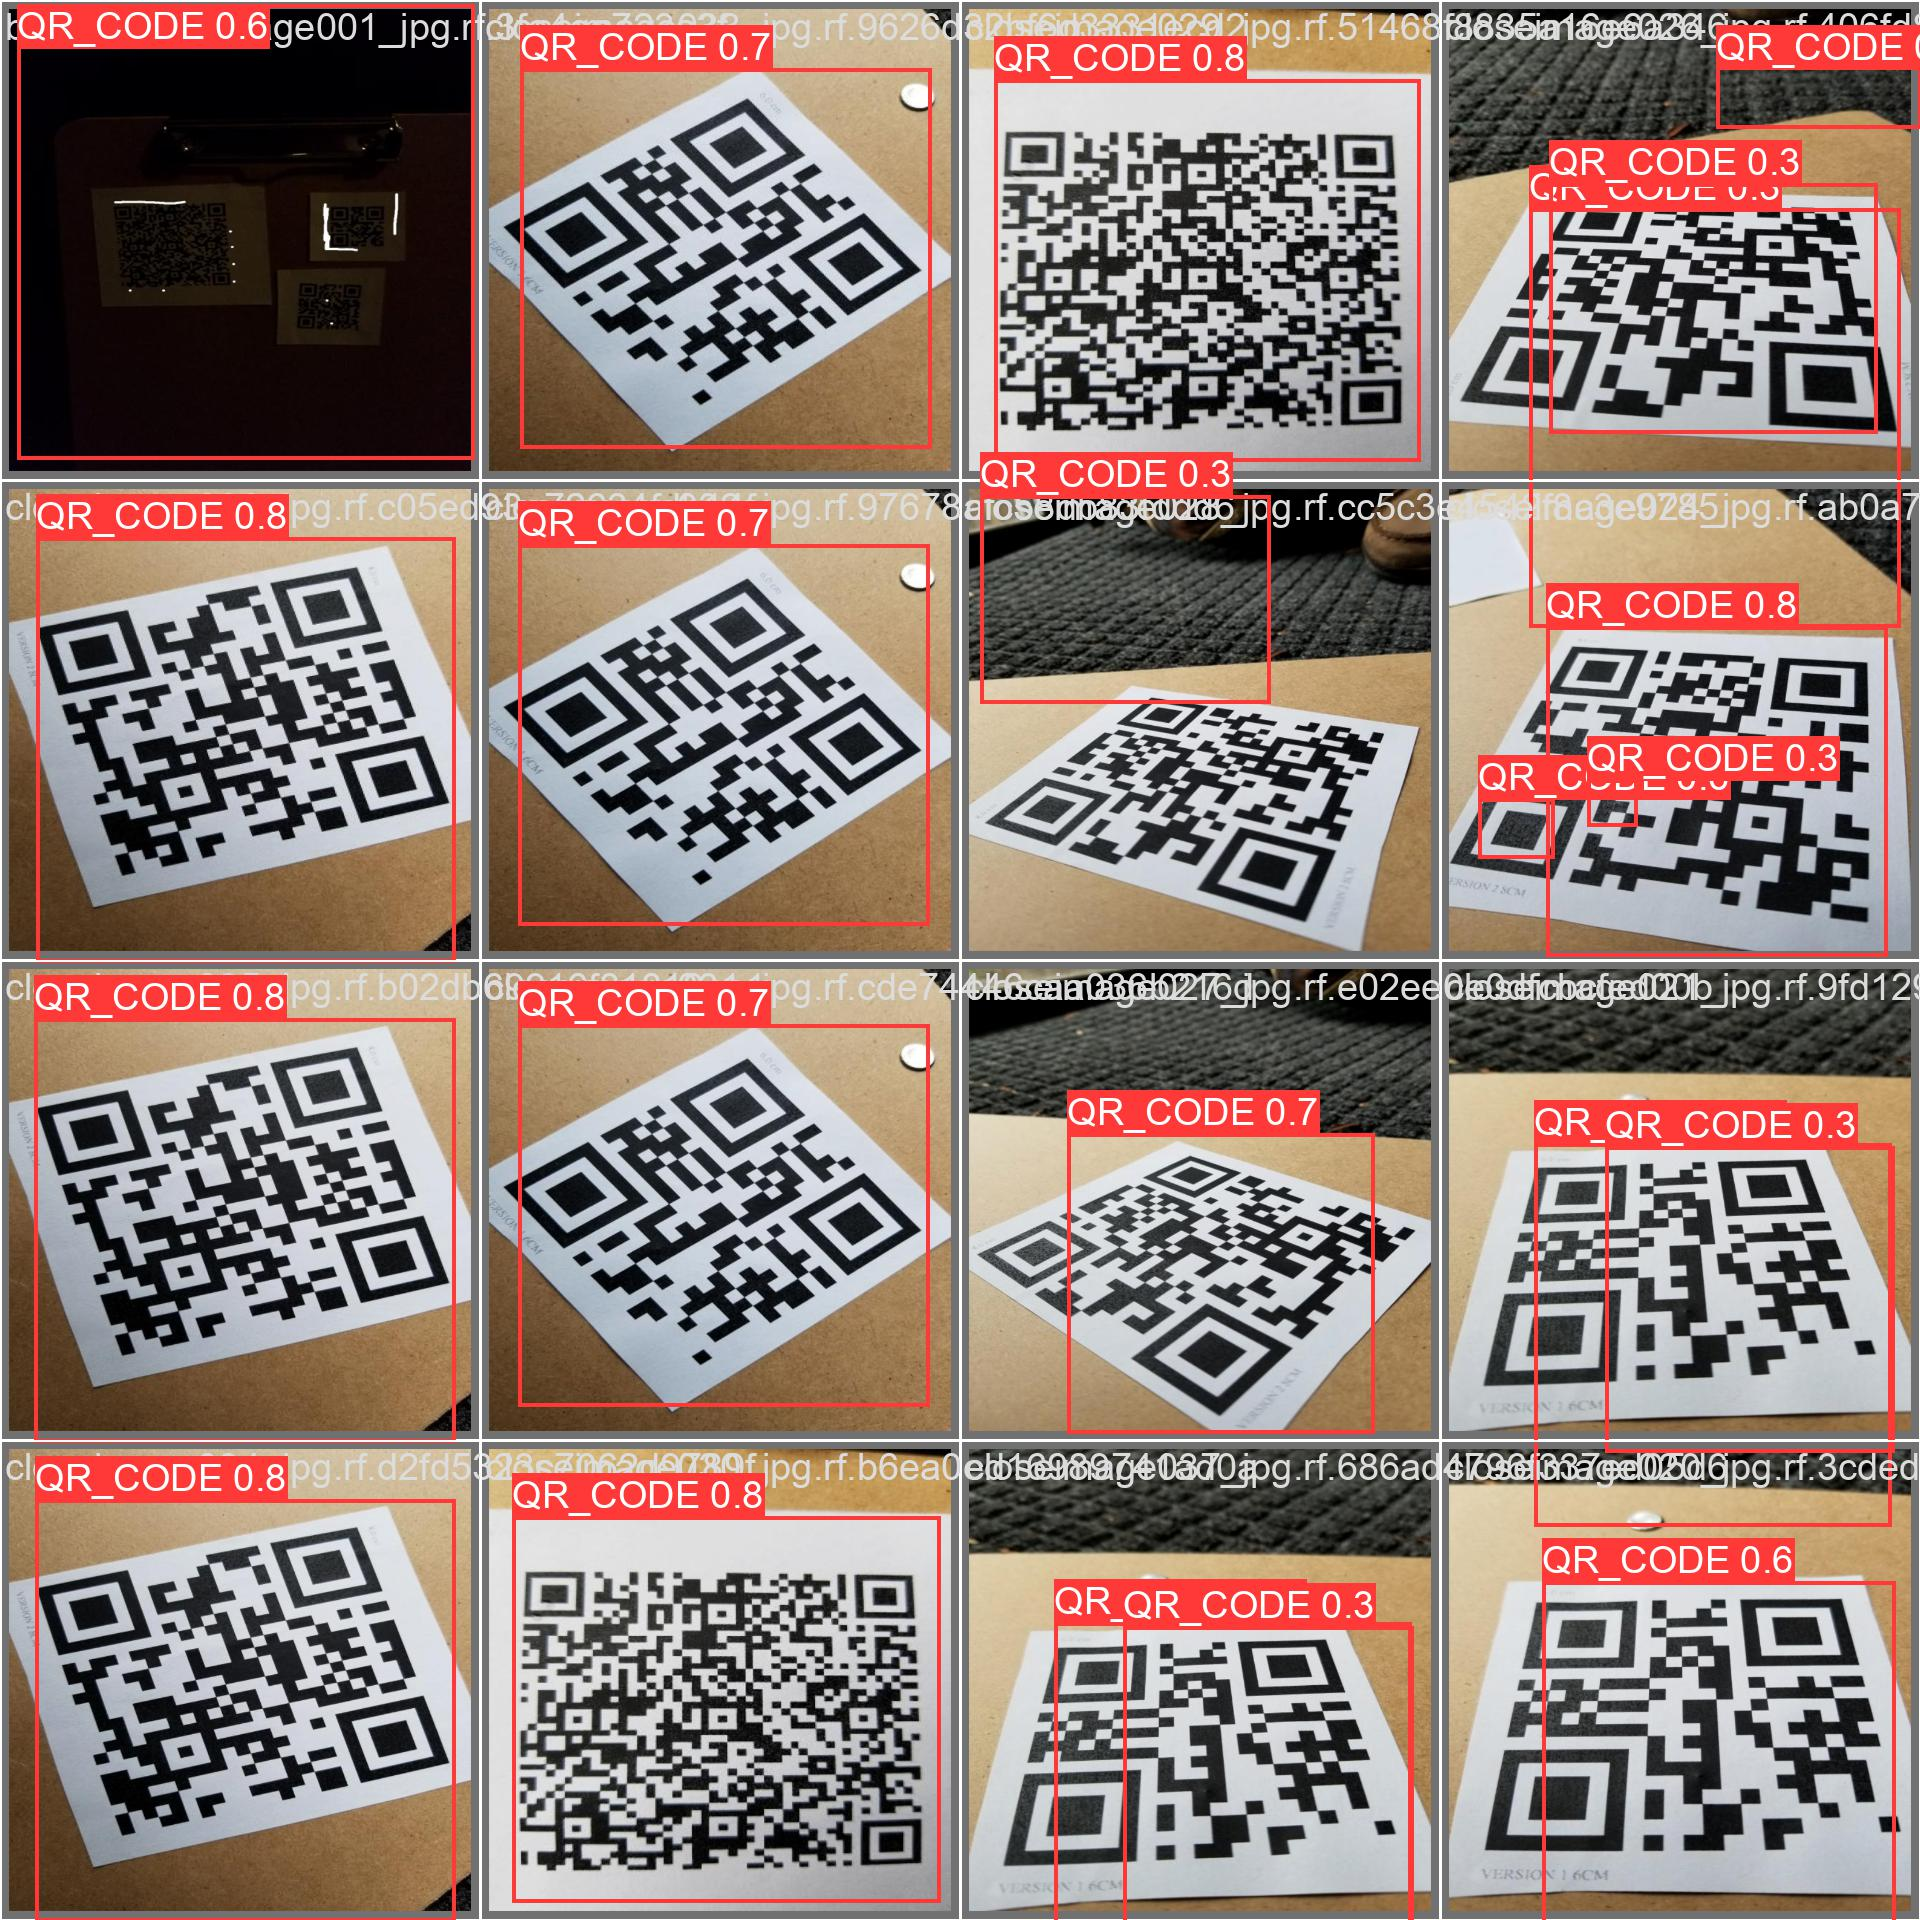

In [11]:
Image(filename=f'runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.130 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
100% 755k/755k [00:00<00:00, 112MB/s]
val: Scanning /content/drive/MyDrive/Colab_Notebooks/truora/qr_scanner/yolov8/datasets/valid/labels.cache... 106 images, 0 backgrounds, 0 corrupt: 100% 106/106 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:09<00:00,  1.33s/it]
                   all        106        208      0.806      0.519      0.556      0.335
Speed: 15.3ms preprocess, 15.7ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/detect/val


**The model reaches the following result in mAP50:**
- Validation: 55.6<br> <br>
It is quite good for a small model. 

## Inference with Custom Model

In [13]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=test/images save=True

Ultralytics YOLOv8.0.130 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/106 /content/drive/MyDrive/Colab_Notebooks/truora/qr_scanner/yolov8/datasets/test/images/bright_spotsimage007_jpg.rf.5f7cd6ec08d10ebab72657b3100775cf.jpg: 800x800 1 QR_CODE, 24.6ms
image 2/106 /content/drive/MyDrive/Colab_Notebooks/truora/qr_scanner/yolov8/datasets/test/images/bright_spotsimage015_jpg.rf.f88a210d45ab04a379ae60f5d3d5a866.jpg: 800x800 2 QR_CODEs, 29.0ms
image 3/106 /content/drive/MyDrive/Colab_Notebooks/truora/qr_scanner/yolov8/datasets/test/images/bright_spotsimage021_jpg.rf.832060c355faaafb19ff4c073e46b729.jpg: 800x800 2 QR_CODEs, 24.7ms
image 4/106 /content/drive/MyDrive/Colab_Notebooks/truora/qr_scanner/yolov8/datasets/test/images/bright_spotsimage029_jpg.rf.790c62de3f0b06e0f588029c22788d9c.jpg: 800x800 3 QR_CODEs, 24.7ms
image 5/106 /content/drive/MyDrive/Colab_Notebooks/truora/qr_scanner/yolov8/datasets

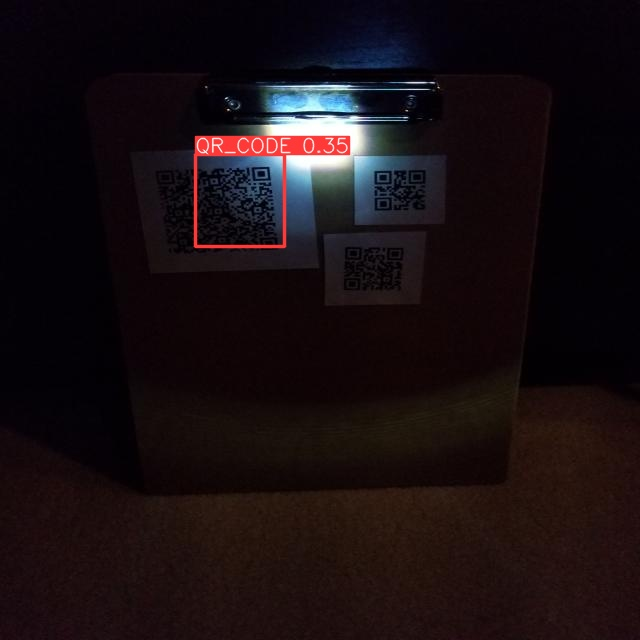

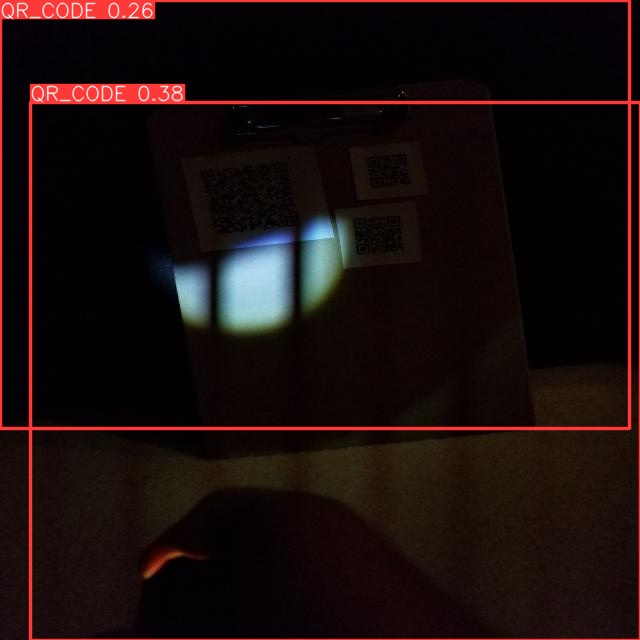

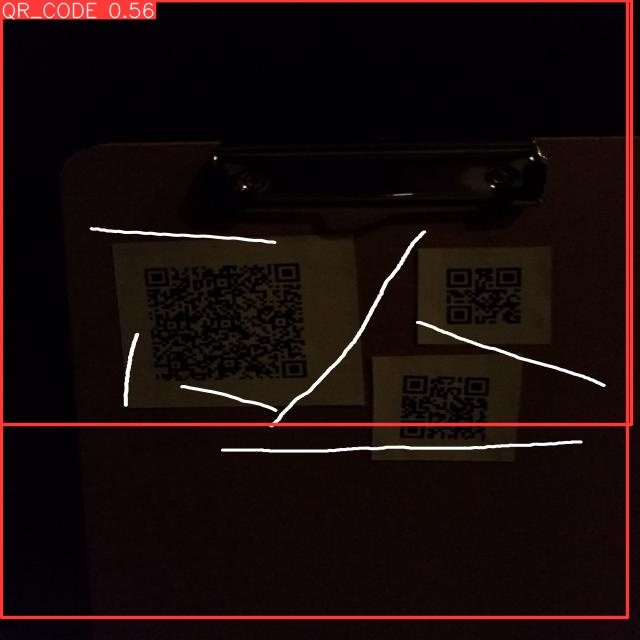

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Test model

In [4]:
model = YOLO("runs/detect/train/weights/best.pt")

In [33]:
im1 = Image.open("runs/detect/predict/perspectiveimage028_jpg.rf.11a1f8c7103fd577ec56ea1c954d9cd0.jpg")
# No saving image
results = model.predict(source=im1)
res_plotted = results[0].plot()


0: 800x800 1 QR_CODE, 222.4ms
Speed: 4.1ms preprocess, 222.4ms inference, 0.5ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3


In [ ]:
# Saving image
results=model.predict(source=im1,conf=0.5,save=True,save_crop=True)


0: 800x800 1 QR_CODE, 222.8ms
Speed: 4.1ms preprocess, 222.8ms inference, 0.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict3


## Reading the detected QR code

In [23]:
def decoder(image):
    gray_img = cv2.cvtColor(image,0)
    try: 
        qr = qr_decode(gray_img)[0]

        qrCodeData = qr.data.decode("utf-8")
        return qrCodeData
    except:
        return "No detecta QR"

In [58]:
decode_img=cv2.imread('runs/detect/predict/perspectiveimage028_jpg.rf.11a1f8c7103fd577ec56ea1c954d9cd0.jpg')
decoder(decode_img)

'No detecta QR'

In [50]:
folder_path = 'runs/detect/predict3/crops/QR_CODE' 

for i,file in enumerate(os.listdir(folder_path)):
    decode_img=cv2.imread(os.path.join(folder_path, file))
    if decoder(decode_img)=='No detecta QR':
        print(f'en el file {file} no se logra decodear')
    else:
        print(f'en el file {file} se decodea',decoder(decode_img))

en el file perspectiveimage028_jpg.rf.jpg no se logra decodear


In [55]:
folder_path = 'runs/detect/predict3' 
image_extensions = ['jpg', 'jpeg', 'png']  # Add other image file extensions if needed

# Iterate over all files in the folder and its subdirectories
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        if any(file.lower().endswith(ext) for ext in image_extensions):
            os.remove(file_path)